In [228]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [229]:
X_TRAIN_FP = "data/X_train.tsv"
X_TEST_FP = "data/X_test.tsv"
Y_TRAIN_FP = "data/y_train.tsv"
Y_TEST_FP = "data/y_test.tsv"
TITLE_TRAIN_FP = "data/title_train.tsv"
TITLE_TEST_FP = "data/title_test.tsv"
LABELS_DICT = {0:"non AI", 1: "AI"}
RANDOM_SEED = 1234
tf.set_random_seed(1234)

X_train = np.loadtxt(X_TRAIN_FP, delimiter="\t")
X_test = np.loadtxt(X_TEST_FP, delimiter="\t")
y_train = np.loadtxt(Y_TRAIN_FP, delimiter="\t")
y_test = np.loadtxt(Y_TEST_FP, delimiter="\t")
title_train = np.genfromtxt(TITLE_TRAIN_FP, delimiter="\t", dtype="str")
title_test = np.genfromtxt(TITLE_TEST_FP, delimiter="\t", dtype="str")
    

In [231]:
model = Sequential()

In [232]:
model.add(Dense(units=X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [233]:
from tensorflow.contrib.keras import losses,optimizers,metrics

In [234]:
model.compile(optimizer=tf.train.AdamOptimizer(0.001), loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [235]:
history = model.fit(X_train, y_train, epochs=10, class_weight={0:1, 1:2}, verbose=1)

Epoch 1/10
32800/32800 [==============================] - 3s 91us/sample - loss: 0.5440 - acc: 0.8220 - precision_11: 0.7162 - recall_11: 0.7867
Epoch 2/10
32800/32800 [==============================] - 3s 84us/sample - loss: 0.4880 - acc: 0.8455 - precision_11: 0.7521 - recall_11: 0.8123
Epoch 3/10
32800/32800 [==============================] - 3s 84us/sample - loss: 0.4627 - acc: 0.8550 - precision_11: 0.7673 - recall_11: 0.8216s - loss: 0.4690 - acc: 0.8
Epoch 4/10
32800/32800 [==============================] - 3s 85us/sample - loss: 0.4414 - acc: 0.8621 - precision_11: 0.7757 - recall_11: 0.8347
Epoch 5/10
32800/32800 [==============================] - 3s 86us/sample - loss: 0.4183 - acc: 0.8712 - precision_11: 0.7903 - recall_11: 0.8439
Epoch 6/10
32800/32800 [==============================] - 3s 85us/sample - loss: 0.3964 - acc: 0.8775 - precision_11: 0.7979 - recall_11: 0.8552
Epoch 7/10
32800/32800 [==============================] - 3s 91us/sample - loss: 0.3740 - acc: 0.8861 -

In [236]:
# plot metrics
# pyplot.plot(history.history['precision_7'], label='precision')
# pyplot.plot(history.history['recall_7'], label='recall')
# pyplot.plot(history.history['loss'], label='loss')
# pyplot.legend(loc="lower left", ncol=1, title="Legend", fancybox=True)
# pyplot.ylim(0, 1.0)
# pyplot.show()

In [237]:
predictions_train = model.predict_classes(X_train)
print(classification_report(y_train, predictions_train))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     21678
         1.0       0.87      0.90      0.89     11122

    accuracy                           0.92     32800
   macro avg       0.91      0.92      0.91     32800
weighted avg       0.92      0.92      0.92     32800



In [238]:
predictions = model.predict_classes(X_test)

In [246]:
# random predictions
predictions = np.random.choice([0, 1], size=(len(y_test),), p=[.67,.33])
# predictions = np.random.choice([0, 1], size=(len(y_test),))

# # abusing imbalance
# predictions = np.zeros(len(y_test))
# predictions

In [247]:
# print(predictions[:25])

In [248]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, predictions)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, predictions)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, predictions)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(y_test, predictions)
print('Cohens kappa: %f' % kappa)

# matthews_corrcoef
# "A correlation of:
#  C =  1 indicates perfect agreement,
#  C =  0 is expected for a prediction no better than random, and
#  C = -1 indicates total disagreement between prediction and observation"`.
mattc = matthews_corrcoef(y_test, predictions)
print('Matthews correlation coefficient: %f' % mattc)

# ROC AUC
auc = roc_auc_score(y_test, predictions)
print('ROC AUC: %f' % auc)
# classification_report
report = classification_report(y_test, predictions)
print(report)
# confusion matrix
cm = confusion_matrix(y_test, predictions)

Accuracy: 0.564756
Precision: 0.352744
Recall: 0.339928
F1 score: 0.346217
Cohens kappa: 0.020180
Matthews correlation coefficient: 0.020188
ROC AUC: 0.510001
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.67      5420
         1.0       0.35      0.34      0.35      2780

    accuracy                           0.56      8200
   macro avg       0.51      0.51      0.51      8200
weighted avg       0.56      0.56      0.56      8200



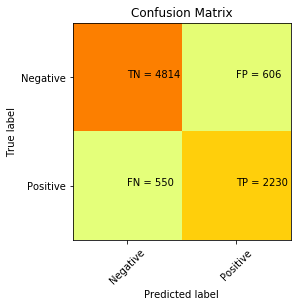

In [242]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# plt.figure(figsize = (10,7))
# sn.heatmap(cm, annot=True);
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [243]:
def get_examples(prediction_value, label_value, n_examples):
    for prediction, label, title in zip(predictions, y_test, title_test):
        if prediction==prediction_value and label==label_value:
            print('> \"'+ title +'\" has been classified as ', LABELS_DICT[prediction[0]], 
                  'and should be ', LABELS_DICT[label])
            n_examples = n_examples - 1
            if n_examples<1:
                print('\n')
                break;


n_examples=10

print("Examples of False Negative:")
get_examples(0,1,n_examples)

print("Examples of False Positives:")
get_examples(1,0,n_examples)

print("Examples of True Negatives:")
get_examples(0,0,n_examples)

print("Examples of True Positives:")
get_examples(1,1,n_examples)

Examples of False Negative:
> "online vehicle detection for estimating traffic status" has been classified as  non AI and should be  AI
> "bethe learning of conditional random fields via map decoding" has been classified as  non AI and should be  AI
> "input fast-forwarding for better deep learning" has been classified as  non AI and should be  AI
> "semantic diversity versus visual diversity in visual dictionaries" has been classified as  non AI and should be  AI
> "towards universal neural nets: gibbs machines and ace" has been classified as  non AI and should be  AI
> "solving internal covariate shift in deep learning with linked neurons" has been classified as  non AI and should be  AI
> "context-aware trajectory prediction" has been classified as  non AI and should be  AI
> "a new approach in persian handwritten letters recognition using error correcting output coding" has been classified as  non AI and should be  AI
> "stochastic function norm regularization of deep networks" has

In [244]:
test = np.arange(6)
idx = [5,3,5]
print(test[idx])
# print([test[i] for i in idx])

[5 3 5]


In [245]:
import string
dictwalk = dict(zip(range(10), list(string.ascii_lowercase)))
print(dictwalk)
walks = [[0,1,2,3],[4,5,6,7],[8,9]]
for walk in walks:
    map(str, walk)
[list(map(lambda x: dictwalk[x], walk)) for walk in walks]

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j'}


[['a', 'b', 'c', 'd'], ['e', 'f', 'g', 'h'], ['i', 'j']]